In [1]:

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import scipy.io as sio
import sys 
import h5py as hp
import argparse
import random
from random import choices, choice
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from IPython.display import HTML, display, Image
from numpy.fft import ifft2,fft2,fft,ifft,fftfreq, fftshift, ifftshift
from scipy.signal import convolve2d, correlate2d
from IPython.display import HTML, display, Image
import time
from tqdm.auto import tqdm
from scipy.io import loadmat, savemat
from scipy.interpolate import interp1d

# import torch
import math
# import torchvision
# import torchvision.transforms as transforms
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.autograd import Variable
# from torch.utils import data
# from tifffile import imread
# from torchsummary import summary
# from torch.nn.utils import spectral_norm
import itertools
def autocor2d(I):
    f = fft2(I)
    f = np.absolute(f)**2
    autocor2d = ifftshift(ifft2(f),dim=(-2,-1))/I.shape[-1]/I.shape[-2]
    return autocor2d
def autocor2d_t(I):
#     f = torch.absolute(torch.fft.fft2(I))**2

#     autocor2d = torch.fft.ifftshift(torch.fft.ifft2( torch.absolute(torch.fft.fft2(I))**2))/I.shape[0]/I.shape[1]
    return  torch.fft.ifftshift(torch.fft.ifft2( torch.absolute(torch.fft.fft2(I))**2),dim=(-2,-1))/I.shape[-1]/I.shape[-2]

def rebin(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

def rebin1d(arr, new_shape):
    shape = (new_shape, arr.shape[0] // new_shape)
    return arr.reshape(shape).mean(-1)

def normalize(x):
    return (x-np.amin(x))/(np.amax(x)-np.amin(x))

def centralpadding(arr, new_shape):
    if new_shape[0]>=arr.shape[0]:
        newarr = np.zeros(new_shape,dtype=complex)
        newarr[(new_shape[0] - arr.shape[0]) //2 : (new_shape[0] + arr.shape[0]) //2 ,
               (new_shape[1] - arr.shape[1]) //2 : (new_shape[1] + arr.shape[1]) //2 ] = arr
    else:
        newarr= arr[(-new_shape[0] + arr.shape[0]) //2 : (new_shape[0] + arr.shape[0]) //2 ,
               (-new_shape[1] + arr.shape[1]) //2 : (new_shape[1] + arr.shape[1]) //2 ]
    return newarr

def ReLU(x):
    return x * (x > 0)


In [26]:
data = np.load('PSD_time_map.npz')
time_total = data['time_total']
size_range = data['size_range']
psd_total = data['psd_total']
print(time_total.shape)
print(psd_total.shape)

(236,)
(236, 63)


[None, None, None, None]

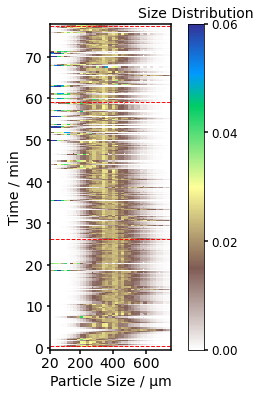

In [27]:
tt = time_total
xx = size_range

TT, XX = np.meshgrid(tt,xx)

plt.figure(figsize=(6,6),facecolor='w')
plt.pcolormesh(XX,TT,psd_total.T ,cmap=plt.cm.terrain_r)
# plt.pcolormesh(XX,TT,psd_total.T ,cmap=plt.cm.rainbow)
plt.axhline(y=0.5, color='r', linestyle='--',label= 'line1',linewidth=1,alpha=0.95)
plt.axhline(y=26.1, color='r', linestyle='--',label= 'line1',linewidth=1,alpha=0.95)
plt.axhline(y=59.2, color='r', linestyle='--',label= 'line1',linewidth=1,alpha=0.95)
plt.axhline(y=77.4, color='r', linestyle='--',label= 'line1',linewidth=1,alpha=0.95)
# plt.axhline(y=86.3, color='r', linestyle='--',label= 'line1',linewidth=1,alpha=0.95)

# plt.legend()
plt.gca().set_aspect(25)
plt.xlim(20,750)
plt.ylim(-0.5,78)
plt.clim(0,0.06)
plt.xticks([20,200,400,600])
# plt.yticks([0,10,20,30,40,50,60,70,80])
plt.gca().yaxis.set_tick_params(labelsize=14,width=1.5)
plt.gca().xaxis.set_tick_params(labelsize=14,width=1.5)
plt.gca().set_xlabel('Particle Size / μm',fontsize=14)
plt.gca().set_ylabel('Time / min',fontsize=14)
[x.set_linewidth(1.5) for x in plt.gca().spines.values()]

clb = plt.colorbar()
clb.ax.set_title('Size Distribution',fontsize=14)
clb.ax.tick_params(labelsize=12,width=1.5)
clb.set_ticks([0,0.02,0.04,0.06,0.08,0.1])
[x.set_linewidth(1.5) for x in clb.ax.spines.values()]
